This notebook is designed to find the 1D reference model for EARA2023

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model_abs=xr.open_dataset("../eara2022/data/model_files/eara2021.nc")
model_per=xr.open_dataset("../eara2022/data/model_files/eara2021_per_ref.nc")

In [10]:
model_abs

<xarray.Dataset>
Dimensions:    (longitude: 421, latitude: 281, depth: 201)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 174.5 174.8 175.0
  * latitude   (latitude) float32 0.0 0.25 0.5 0.75 ... 69.25 69.5 69.75 70.0
  * depth      (depth) float32 0.0 10.0 20.0 30.0 ... 1.98e+03 1.99e+03 2e+03
Data variables:
    vpv        (longitude, latitude, depth) float32 ...
    vph        (longitude, latitude, depth) float32 ...
    vsv        (longitude, latitude, depth) float32 ...
    vsh        (longitude, latitude, depth) float32 ...
    eta        (longitude, latitude, depth) float32 ...
    rho        (longitude, latitude, depth) float32 ...
    vs         (longitude, latitude, depth) float32 ...
    vp         (longitude, latitude, depth) float32 ...

In [25]:
ref_vs=model_abs["vs"]/(1+model_per["vs"])
ref_vp=model_abs["vp"]/(1+model_per["vp"])
vs=[]
vp=[]
deps=[]

for i,dep in enumerate(model_abs["depth"].data):
    vs.append(np.nanmean(ref_vs[:,:,i]))
    vp.append(np.nanmean(ref_vp[:,:,i]))
    deps.append(dep)

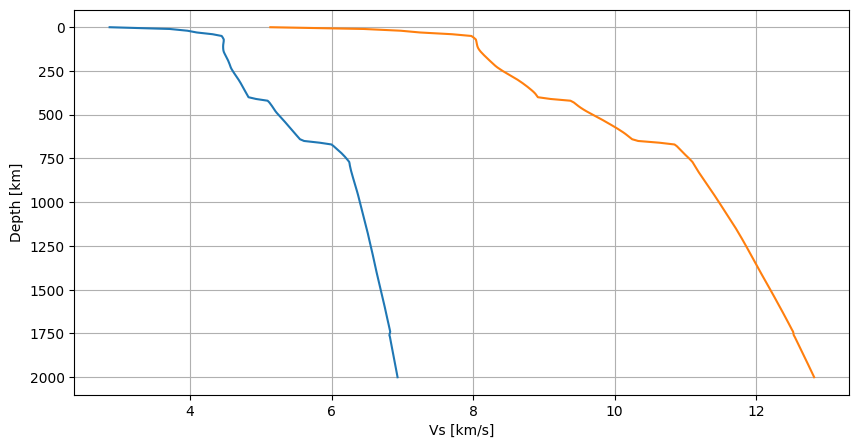

In [26]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(vs,deps)
ax.plot(vp,deps)
ax.set_xlabel("Vs [km/s]")
ax.set_ylabel("Depth [km]")
ax.invert_yaxis()
ax.grid()
plt.show()

In [27]:
# save to pandas dataframe
df=pd.DataFrame({"depth":deps,"vs":vs,"vp":vp})
df.to_csv("../eara2022/data/model_files/eara2021_1dref_just_average_not_actual.csv",index=False)